In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import os

In [3]:
pdata= pd.read_csv('Tweets.csv')

In [4]:
pdata.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
pdata.isnull().sum()*100/len(pdata)
#checking for missing values

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [6]:
pdata.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
pdata.shape

(14640, 15)

In [9]:
#EDA same as virtualized data

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

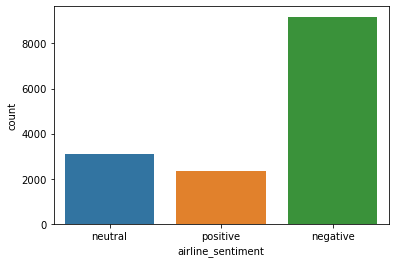

In [10]:
print(pdata['airline_sentiment'].value_counts())
sns.countplot(pdata['airline_sentiment'])

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

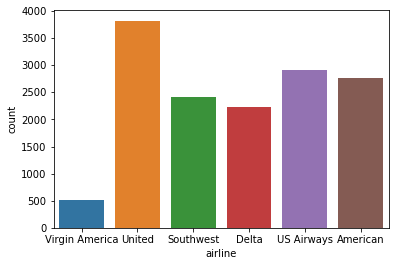

In [11]:
print(pdata['airline'].value_counts())
sns.countplot(pdata['airline'])

In [12]:
pdata.drop('airline_sentiment_gold', axis =1, inplace = True)
pdata.drop('negativereason_gold', axis =1, inplace = True)
pdata.drop('tweet_coord', axis =1, inplace = True)

negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64 US Airways
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64 United
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64 American
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64 Southwest
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64 Delta


C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEOWISE\anaconda

negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64 Virgin America


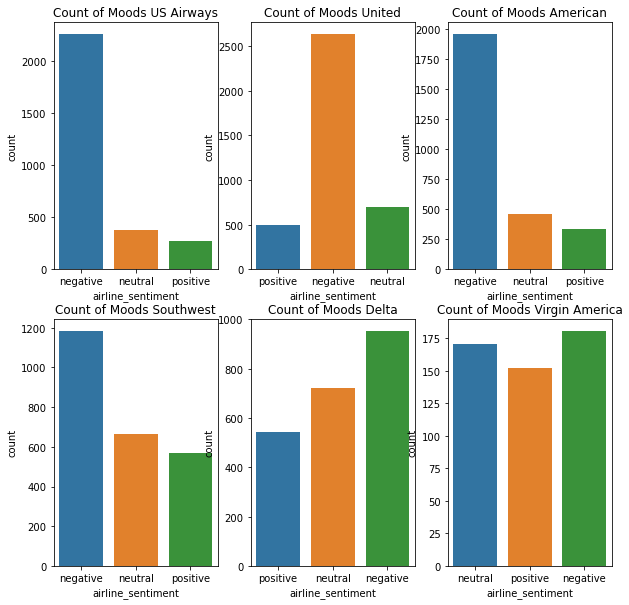

In [17]:
plt.figure(1, figsize=(10,10))
airlines=['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
    indices =airlines.index(i)
    plt.subplot(2,3,indices + 1)
    new_value= pdata[pdata['airline']==i]
    print(new_value['airline_sentiment'].value_counts(),i)
    index =[1,2,3]
    sns.countplot(new_value['airline_sentiment'])
    plt.title('Count of Moods ' +i)

In [18]:
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

nltk.download('stopwords')
stop_words= stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEOWISE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
#word cloud ; visual representation of the text data
#they are very popular because they help us easily spot the most frequently occurring words. the more frequent the word 
#the word is used the larger and bolder it is displayed . that the help to tackel the main problem

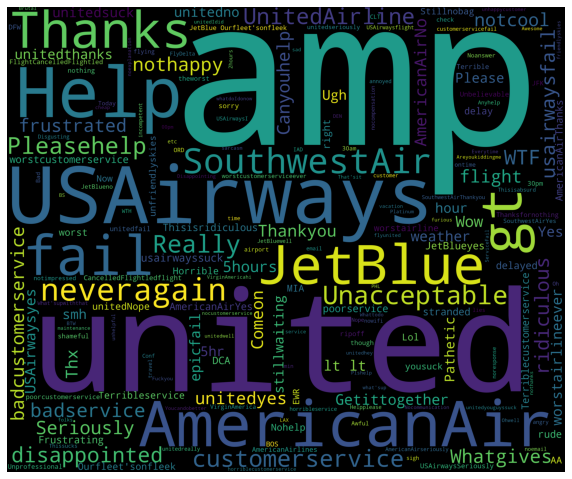

In [21]:
new_data = pdata[pdata['airline_sentiment']=='negative']
words = ''.join(new_data['text'])
cleaned_word=''.join([word for word in words.split()
                     if 'http' not in word
                     and not word.startswith('@')
                     and word != 'RT'])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color ='black',
                     width = 3000,
                     height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

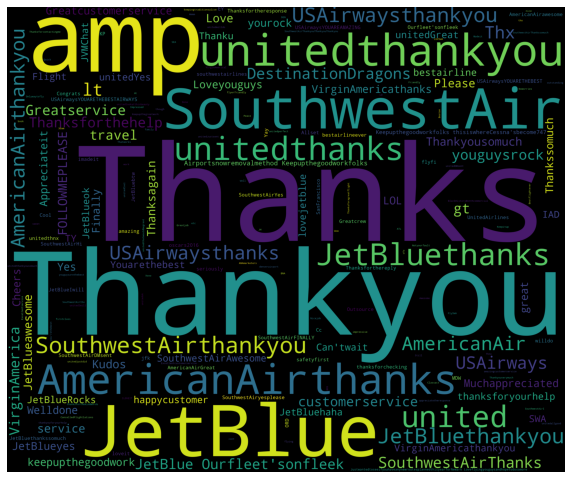

In [22]:
new_data = pdata[pdata['airline_sentiment']=='positive']
words = ''.join(new_data['text'])
cleaned_word=''.join([word for word in words.split()
                     if 'http' not in word
                     and not word.startswith('@')
                     and word != 'RT'])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color ='black',
                     width = 3000,
                     height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

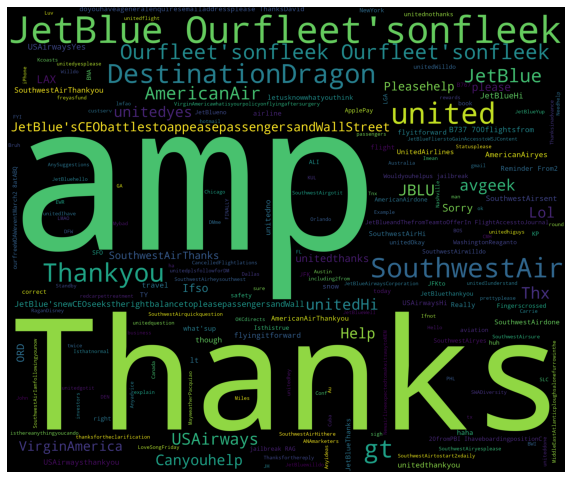

In [24]:
new_data = pdata[pdata['airline_sentiment']=='neutral']
words = ''.join(new_data['text'])
cleaned_word=''.join([word for word in words.split()
                     if 'http' not in word
                     and not word.startswith('@')
                     and word != 'RT'])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color ='black',
                     width = 3000,
                     height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


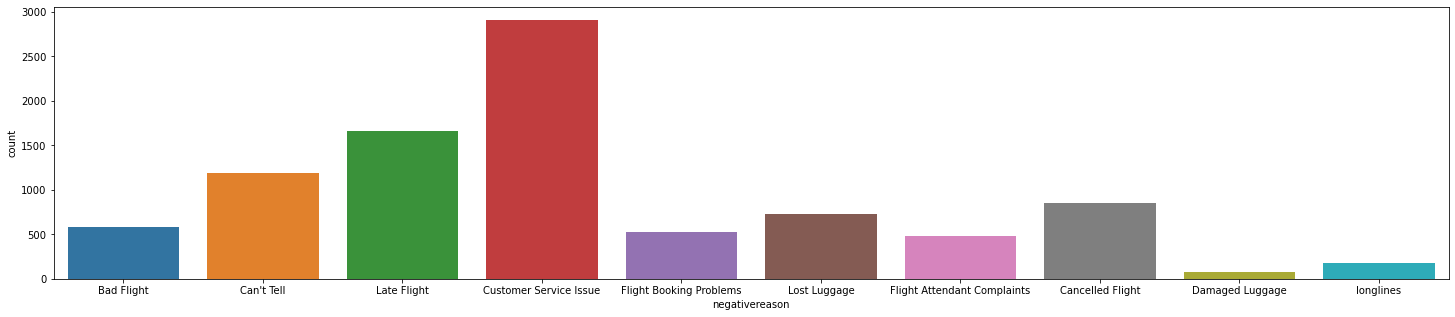

In [25]:
print(pdata.negativereason.value_counts())
plt.figure(figsize=(25,5))
sns.countplot(pdata.negativereason)
plt.show()

C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEOWISE\anaconda

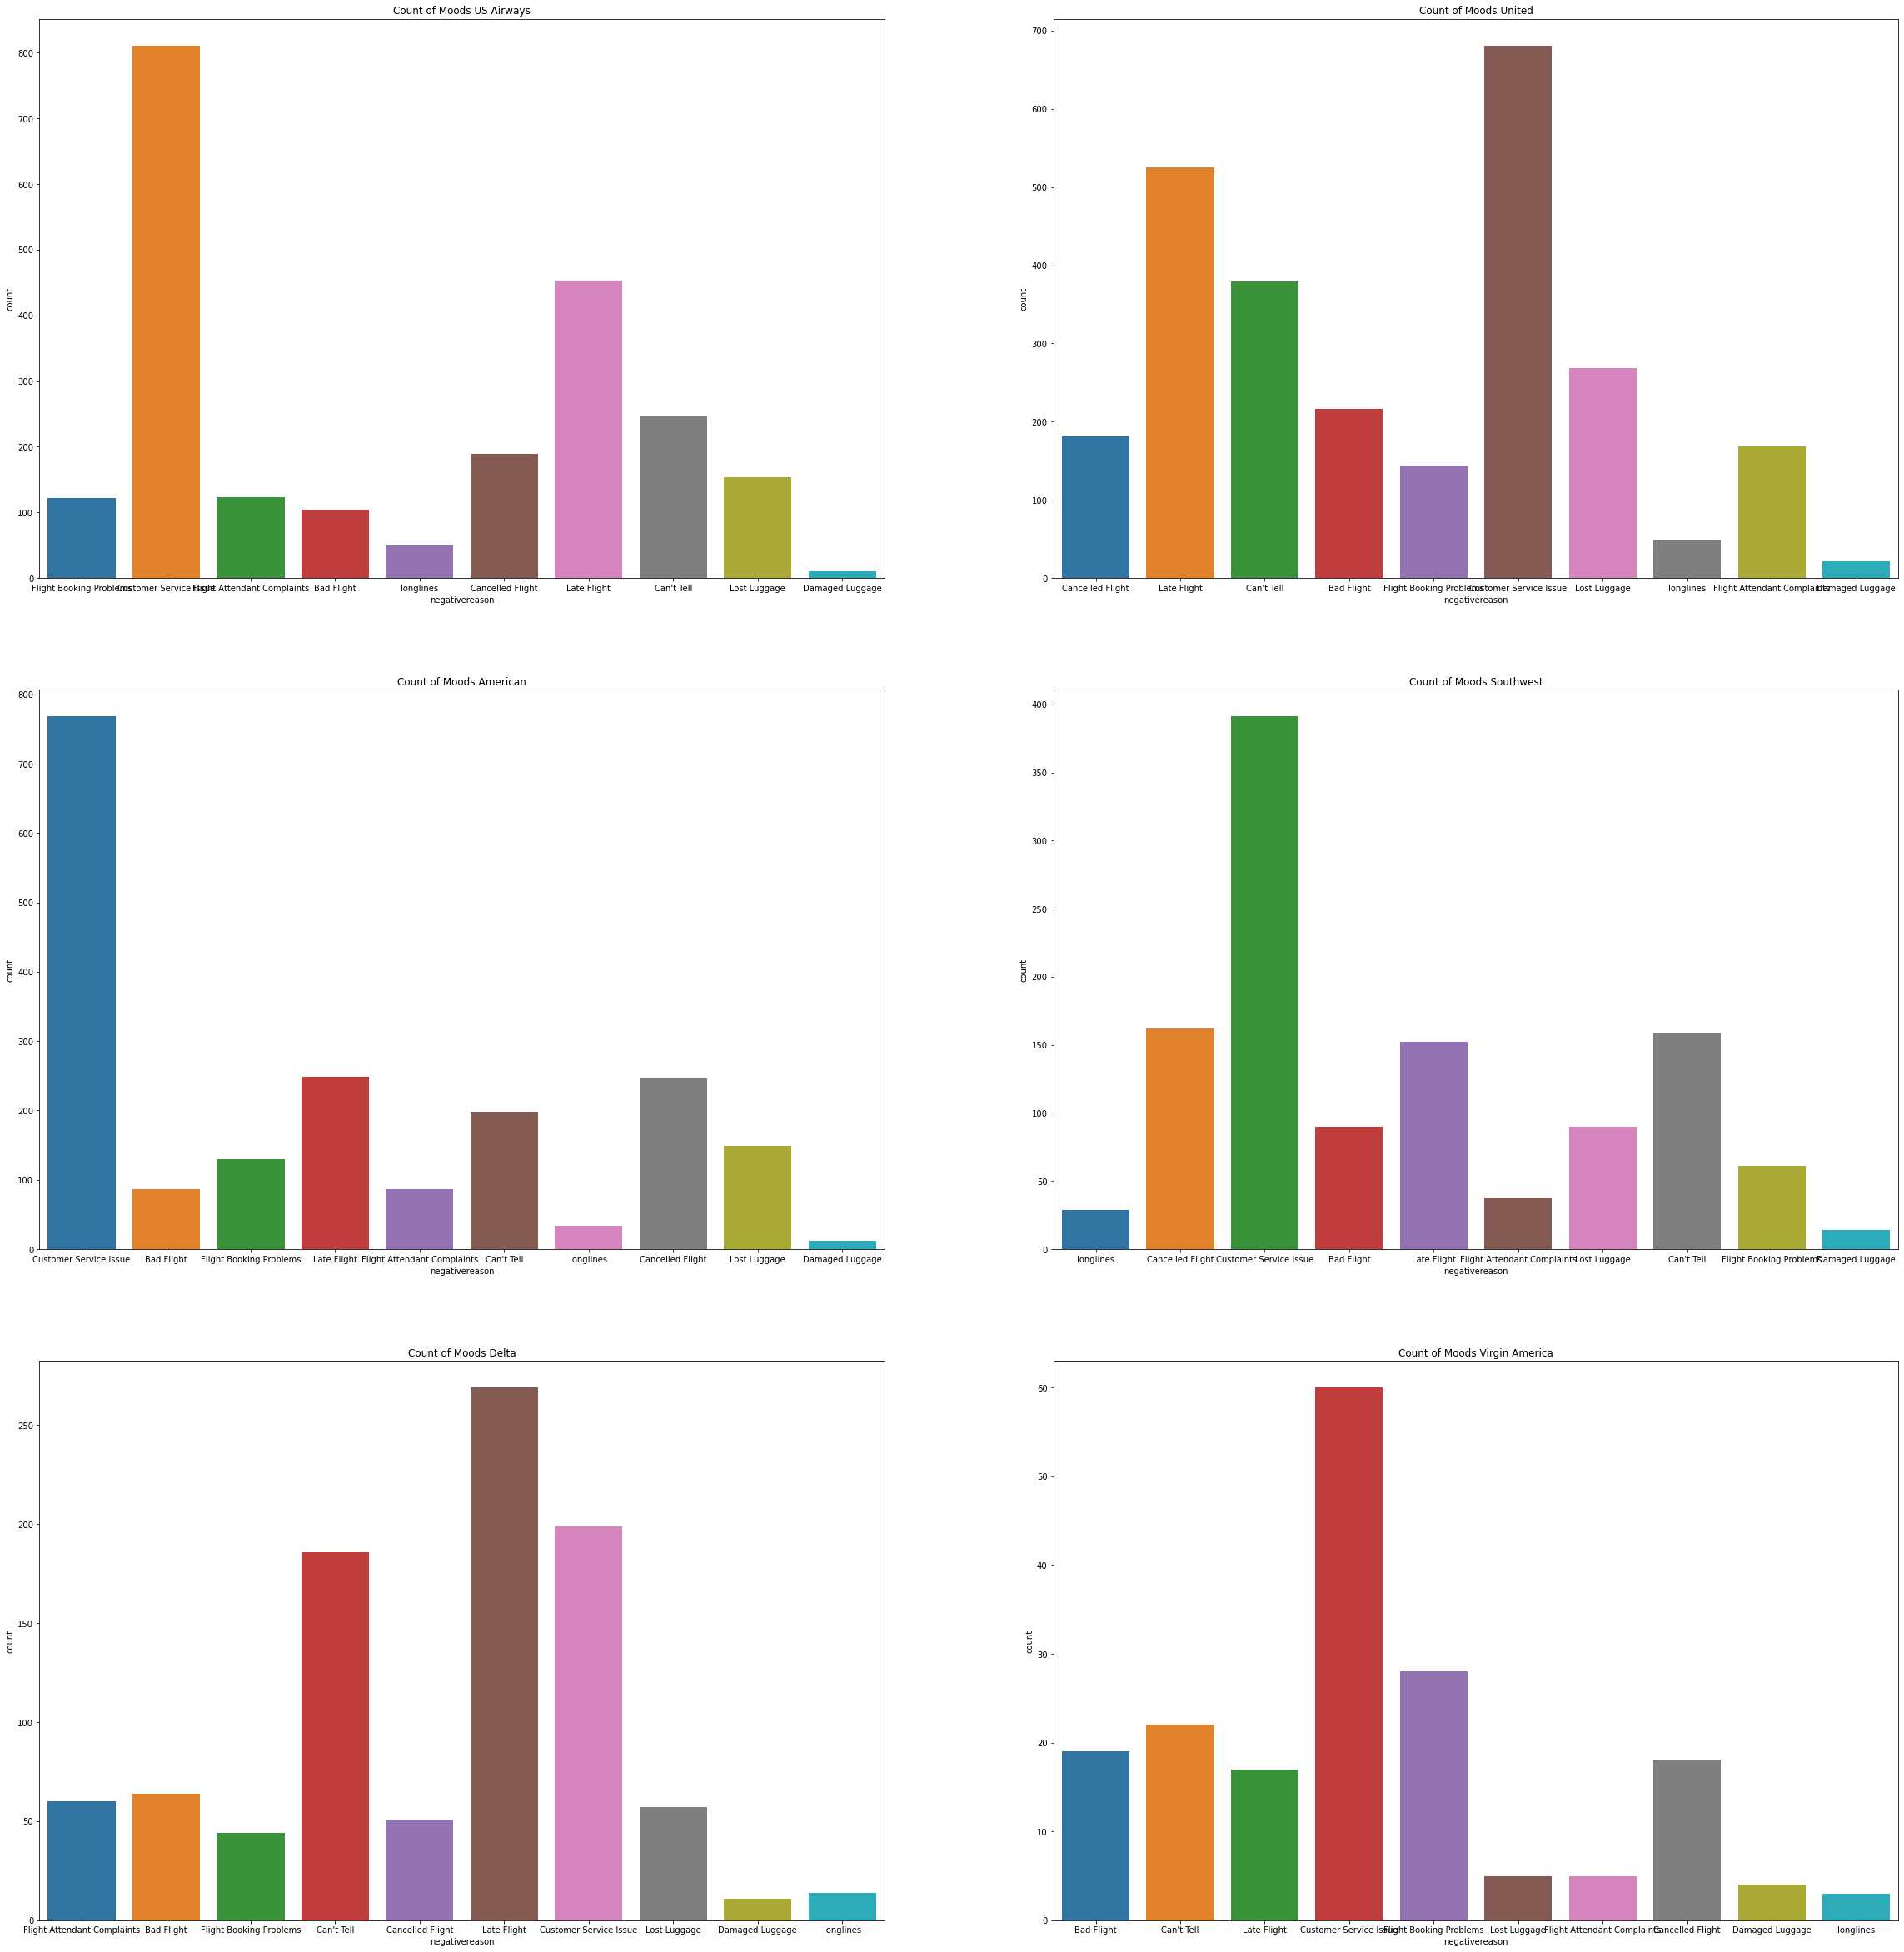

In [26]:
plt.figure(1, figsize=(40,42))
airlines=['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
    indices =airlines.index(i)
    plt.subplot(3,2,indices + 1)
    new_value= pdata[pdata['airline']==i]
    index =[1,2,3,4,5,6,7,8,9,10]
    sns.countplot(new_value['negativereason'])
    plt.title('Count of Moods ' +i)

In [27]:
text_cleaning_re= "@\S+|https?:\S|[^A-Za-z0-9]+"

In [30]:
def preprocess(x,stem =False):
    x=re.sub(text_cleaning_re,'',str(x).lower()).strip()
    tokens=[]
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
        return ''.join(tokens)
pdata.text=pdata.text.apply(lambda x:preprocess(x))

In [31]:
pdata['sentiment']=pdata['airline_sentiment'].apply(lambda x: 0 if x =='negative' else 1)

In [32]:
print(pdata.sentiment.value_counts())

0    9178
1    5462
Name: sentiment, dtype: int64


In [33]:
y=pdata.sentiment

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(min_df=10)
X= vectorizer.fit_transform(pdata.text)

In [39]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
model= LogisticRegression()

In [42]:
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
pred= model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.644808743169399

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1870
           1       1.00      0.02      0.03      1058

    accuracy                           0.64      2928
   macro avg       0.82      0.51      0.41      2928
weighted avg       0.77      0.64      0.51      2928



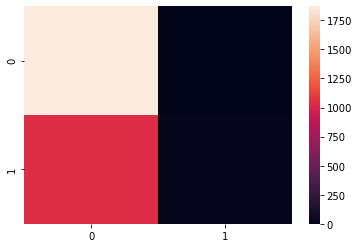

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test,model.predict(X_test)))

In [49]:
from sklearn.ensemble import RandomForestClassifier
models= RandomForestClassifier()
models.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
score= models.score(X_test, y_test)
score

0.644808743169399

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1870
           1       1.00      0.02      0.03      1058

    accuracy                           0.64      2928
   macro avg       0.82      0.51      0.41      2928
weighted avg       0.77      0.64      0.51      2928



<AxesSubplot:>

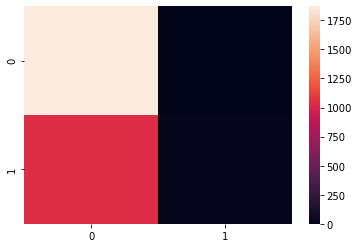

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, models.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, models.predict(X_test)))

In [53]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

MLPClassifier()

In [54]:
pred3 = MLP.predict(X_test)

In [55]:
MLP.score(X_test,y_test)

0.644808743169399

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1870
           1       1.00      0.02      0.03      1058

    accuracy                           0.64      2928
   macro avg       0.82      0.51      0.41      2928
weighted avg       0.77      0.64      0.51      2928



<AxesSubplot:>

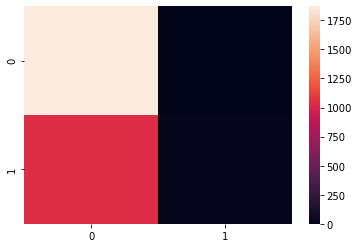

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred3))
sns.heatmap(confusion_matrix(y_test, pred3))